A time series dataset depicting the total number of female births recording in California, USA during the year of 1959.

This is a basic time series dataset, with only the date ("dd/mm/yyyy" format), and the number of births. There are 365 records in total.

In [0]:
# import modules
import pandas as pd

# load data set
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [0]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


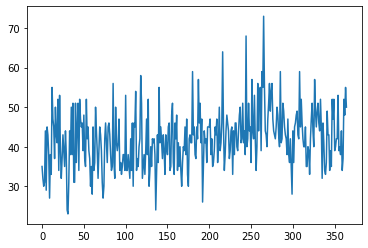

In [0]:
df['Births'].plot()

In [0]:
df.index

RangeIndex(start=0, stop=365, step=1)

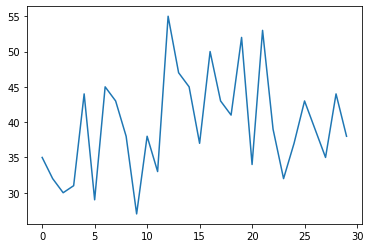

In [0]:
# plot the range 0 to 31
df[0:30]['Births'].plot()

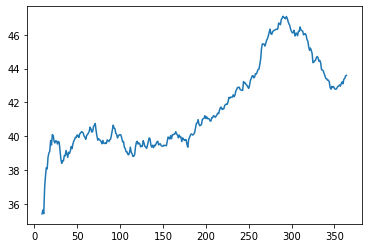

In [0]:
#Rolling mean for births 
df['Births'].rolling(min_periods = 10, window=60, center=False).mean().plot()

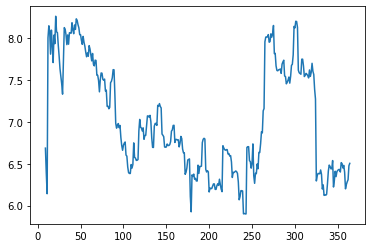

In [0]:
#Rolling standard deviations for births 
df['Births'].rolling(min_periods = 10, window=60, center=False).std().plot()

In [0]:
# let's play around with some if statements

# Let's do a silly one
df.loc[df['Date'] == '1959-07-02', 'birthday'] = 'TRUE'
df.loc[df['Date'] != '1959-07-02', 'birthday'] = 'FALSE'
df[df['birthday'] == 'TRUE'].head()


,Date,Births,birthday
182,1959-07-02,45,TRUE


In [0]:
# Let's randomly sample 50 and call it dfb
dfb = df.sample(n=50)


In [0]:
# Let's pull the 10 days with the largest daily births
df.nlargest(10, 'Births')

,Date,Births,birthday
265,1959-09-23,73,FALSE
244,1959-09-02,68,FALSE
216,1959-08-05,64,FALSE
180,1959-06-30,59,FALSE
263,1959-09-21,59,FALSE
285,1959-10-13,59,FALSE
308,1959-11-05,59,FALSE
118,1959-04-29,58,FALSE
187,1959-07-07,57,FALSE
251,1959-09-09,57,FALSE


In [0]:
# Let's go from long to wide
# Use pivot to have a column for every date and let birthday be the index and Births be the value
df.pivot(index='birthday',columns='Date', values='Births')


Date,1959-01-01,1959-01-02,1959-01-03,1959-01-04,1959-01-05,1959-01-06,1959-01-07,1959-01-08,1959-01-09,1959-01-10,1959-01-11,1959-01-12,1959-01-13,1959-01-14,1959-01-15,1959-01-16,1959-01-17,1959-01-18,1959-01-19,1959-01-20,1959-01-21,1959-01-22,1959-01-23,1959-01-24,1959-01-25,1959-01-26,1959-01-27,1959-01-28,1959-01-29,1959-01-30,1959-01-31,1959-02-01,1959-02-02,1959-02-03,1959-02-04,1959-02-05,1959-02-06,1959-02-07,1959-02-08,1959-02-09,...,1959-11-22,1959-11-23,1959-11-24,1959-11-25,1959-11-26,1959-11-27,1959-11-28,1959-11-29,1959-11-30,1959-12-01,1959-12-02,1959-12-03,1959-12-04,1959-12-05,1959-12-06,1959-12-07,1959-12-08,1959-12-09,1959-12-10,1959-12-11,1959-12-12,1959-12-13,1959-12-14,1959-12-15,1959-12-16,1959-12-17,1959-12-18,1959-12-19,1959-12-20,1959-12-21,1959-12-22,1959-12-23,1959-12-24,1959-12-25,1959-12-26,1959-12-27,1959-12-28,1959-12-29,1959-12-30,1959-12-31
birthday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FALSE,35.0,32.0,30.0,31.0,44.0,29.0,45.0,43.0,38.0,27.0,38.0,33.0,55.0,47.0,45.0,37.0,50.0,43.0,41.0,52.0,34.0,53.0,39.0,32.0,37.0,43.0,39.0,35.0,44.0,38.0,24.0,23.0,31.0,44.0,38.0,50.0,38.0,51.0,31.0,31.0,...,40.0,57.0,49.0,45.0,49.0,51.0,46.0,44.0,52.0,45.0,32.0,46.0,41.0,34.0,33.0,36.0,49.0,43.0,43.0,34.0,39.0,35.0,52.0,47.0,52.0,39.0,40.0,42.0,42.0,53.0,39.0,40.0,38.0,44.0,34.0,37.0,52.0,48.0,55.0,50.0
TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
